# Homework3

## Task: 
Pick up a dataset from: https://github.com/awesomedata/awesome-public-datasets<br>
Do data process on it.

## The dataset:
Titanic dataset: https://www.kaggle.com/c/titanic/data<br>

## Variables in the dataset

|Variables|Definition|Key|
|-|-|-|
|Survival|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex| |
|Age|Age in years| |
|Sibsp|# of siblings/spouses abroad the Titanic| |
|Parch|# of parents/children abroad the Titanic| |
|Ticket|ticket number| |
|Fare|Passenger fare| |
|Cabin|Cabin number| |
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## Useful website
Titanica: https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html<br>
<img width="1440" alt="whole" src="https://user-images.githubusercontent.com/44624585/61586472-a9114180-ab29-11e9-8483-195db549a06e.png"><br><br>

## What we need to check
- Duplicated rows
- Missing Values
- Outliers
- Remove Columns
- Non-numerical Data
- Multiple Value Ranges

## Import and get to know the data

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [117]:
train_path = Path("../data/train.csv")
test_path = Path("../data/test.csv")
submit_example_path = Path("../data/data/gender_submission.csv")
submit_path = Path("../data/submission.csv")

In [3]:
original_df = pd.read_csv(str(train_path), index_col=["PassengerId"])
original_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
original_df.shape

(891, 11)

In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Duplicated rows
Check if there are any duplicated rows in the data frame.

In [6]:
def check_duplicated(df):
    """
    Check if there are any duplicated rows.
    If so, print them.
    Returns a new DataFrame which doesn't have any duplicated rows.
    
    Parameters
    ----------------
    df: Pandas DataFrame
    Could contain duplicated rows.
    
    Return
    ---------
    removed_df: Pandas DataFrame
    A Pandas dataFrame which doesn't have any duplicated rows.
    """
    for i, x in enumerate(df.duplicated()):
        if x == True:
            print(df.iloc[i])
    removed_df = df.drop_duplicates()
    return removed_df

In [7]:
df = check_duplicated(original_df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
original_df.shape

(891, 11)

## Missing Values
Check if there are any columns that have missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df.columns[df.isnull().any()].tolist()

['Age', 'Cabin', 'Embarked']

### Columns that have missing values
There are three columns which have missing values.
- Age
- Cabin
- Embarked

### Print some examples of rows that have a missing value in Column Age or Column.

#### Age:

In [11]:
df[df["Age"].isnull()].head()  # Examples of rows that doesn't have the value in Age column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [12]:
print("The number of missing values in Age column is: {} out of {}.".format(df["Age"].isnull().sum(), len(df["Age"])))

The number of missing values in Age column is: 177 out of 891.


#### Cabin:

In [13]:
df[df["Cabin"].isnull()].head()  # Examples of rows that doesn't have the value in Cabin column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [14]:
print("The number of missing values in Cabin column is: {} out of {}.".format(df["Cabin"].isnull().sum(), len(df["Cabin"])))

The number of missing values in Cabin column is: 687 out of 891.


#### Embarked:

In [15]:
df[df["Embarked"].isnull()].head()  # Examples of rows that doesn't have the value in Cabin column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
print("The number of missing values in Embarked column is: {} out of {}.".format(df["Embarked"].isnull().sum(), len(df["Embarked"])))

The number of missing values in Embarked column is: 2 out of 891.


## How are we going to tackle these missing calues

### 1. Age column
**My thought:**
- Try to find variables that might have a correlation with Age.
    - `Survived` should be correlated with Age.<br><br>
    - `Pclass` could be correlated with Age.<br><br>
    - If the columns above two don't have any correlation with Age, we need to look into other variables.

Let's take a look at correlations betweel columns which have numerical values.

In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**What we can say from this correlation table**
- Actually no correlation between `Survived` and `Age`.
- There is a correlation between `Pclass` and `Age`. But why is it negative?
    - **Because Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd. It's better to fix this to 1 = 3rd, 2 = 2nd, 3 = 1st**, which I will do later.
- We can see the correlation between `Pclass` and `Fare`. Why negative?
    - The same reason as above
- The number of siblings seems a little bit related to `Age`. 
    - Means that younger people have more siblings than older people.

**Solution**

`Pclass` has the biggest absolute value of correlation with `Age` in this table.
So what I am going to do is take the average of each `Pclass` and fill the values into blanks.

In [18]:
# Need
meanAge_pclass = round(df["Age"].groupby(df["Pclass"]).mean()).tolist()
print(meanAge_pclass)
df["Age"][df["Pclass"] == 1 & df["Age"].isnull()] = meanAge_pclass[0]

[38.0, 30.0, 25.0]


/Users/koheisuzuki/anaconda3/envs/7gate_ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
df2 = pd.DataFrame(df["Age"][df["Pclass"] == 2])
idxs2 = df2[df2["Age"].isnull()].index.tolist()
idxs2 = np.array(idxs2)
idxs2 = idxs2 - 1
idxs2 = list(idxs2)
df.iloc[idxs2, 4] = meanAge_pclass[1]

df3 = pd.DataFrame(df["Age"][df["Pclass"] == 3])
idxs3 = df3[df3["Age"].isnull()].index.tolist()
idxs3 = np.array(idxs3)
idxs3 = idxs3 - 1
idxs3 = list(idxs3)
df.iloc[idxs3, 4] = meanAge_pclass[2]

[17, 181, 277, 303, 413, 466, 481, 547, 596, 674, 732]


In [20]:
df.iloc[idxs2, 4]

PassengerId
18     30.0
182    30.0
278    30.0
304    30.0
414    30.0
467    30.0
482    30.0
548    30.0
597    30.0
675    30.0
733    30.0
Name: Age, dtype: float64

In [22]:
df["Age"].isnull().sum()

0

### 2. Cabin Column

In [23]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Titanica: https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html<br>
<img width="1440" alt="whole" src="https://user-images.githubusercontent.com/44624585/61586472-a9114180-ab29-11e9-8483-195db549a06e.png"><br><br>
<img width="1440" alt="boatdeck" src="https://user-images.githubusercontent.com/44624585/61586475-b9c1b780-ab29-11e9-899a-b7b726adc89e.png">

**Summary of this site**
- Boat deck is the top floar
- A, B decks are for 1st class
- C, D decks are for 2nd class
- E, F, G decks are for 3rd class

**My thought:**
The location of the cabin might be important because the convenience of accessing boats depends on the location of cabins or the floor. 

#### Let's create a bar plot whose x-axis is Cabins and y-axis is the number of people.

In [24]:
df_copy = df[df["Cabin"].notnull()]
f = lambda x: x[0]
df_copy["Cabin"] = df_copy["Cabin"].map(f)
df_copy.head(10)

/Users/koheisuzuki/anaconda3/envs/7gate_ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B,C


In [25]:
# This cell is for calculating the percentages for each cabin.
survived0_cabin = df_copy[df_copy["Survived"] == 0].groupby("Cabin").count()[["Survived"]]
survived1_cabin = df_copy[df_copy["Survived"] == 1].groupby("Cabin").count()[["Survived"]]
survived1_cabin = survived1_cabin.append({"Survived": 0}, ignore_index=True)
survived1_cabin.index = survived0_cabin.index

num_people0_arr = np.array(survived0_cabin["Survived"].astype("float32").tolist())
num_people1_arr = np.array(survived1_cabin["Survived"].astype("float32").tolist())
num_people_sum = num_people0_arr + num_people1_arr

percentages = []
for i, num_people in enumerate(num_people_sum):
    percentage = int(survived0_cabin["Survived"][i]) / num_people
    percentages.append(percentage)

for i, num_people in enumerate(num_people_sum):
    percentage = int(survived1_cabin["Survived"][i]) / num_people
    percentages.append(percentage)

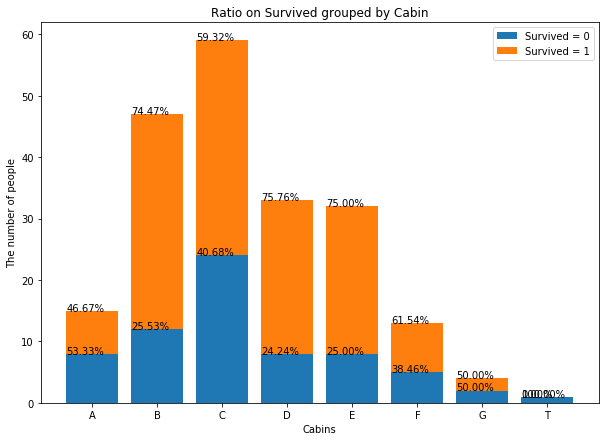

In [26]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title("Ratio on Survived grouped by Cabin")
ax.set_xlabel("Cabins")
ax.set_ylabel("The number of people")
p1 = ax.bar(survived0_cabin.index, survived0_cabin["Survived"])
p2 = ax.bar(survived1_cabin.index, survived1_cabin["Survived"], bottom=survived0_cabin["Survived"])
plt.legend((p1[0], p2[0]), ('Survived = 0', 'Survived = 1'));

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(percentages[i] * 1), (x, y + height + 0.01))

**Conclusion of this plot**

Although the hight of each bar is different but the ratio is more important in this plot.
I am going to get rid of the `Cabin` column from the original dataset.

**Because**
- The result shows that there is not significant correlation between `Survived` and `Cabin`.
- `Cabin` column is missing 77.1% of values out of 891 observations.

### 3. Embarked

In [27]:
df[df["Embarked"].isnull()].head()  # Examples of rows that doesn't have the value in Cabin column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
counts_emb = pd.value_counts(df["Embarked"]).tolist()
emb = df["Embarked"].unique().tolist()[:-1]
emb_dict = {
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown"
}
emb = [emb_dict[x] for x in emb]

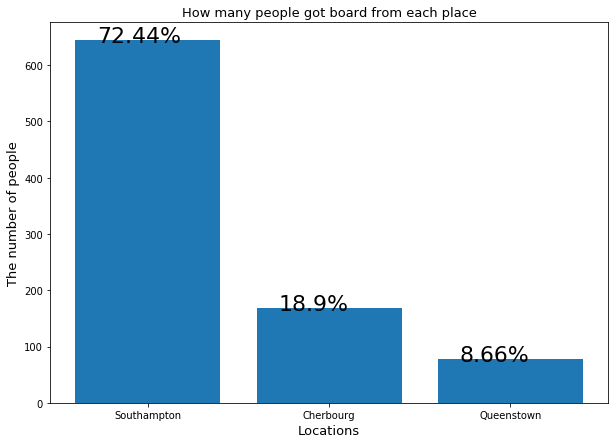

In [29]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.bar(emb, counts_emb)
ax.set_title("How many people got board from each place",
                 fontsize=13)
ax.set_xlabel("Locations", fontsize=13)
ax.set_ylabel("The number of people", fontsize=13)

totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='black')

**Solution**
I am going to fill the two blank with `S`, which is short for `Southampton`.

In [30]:
df["Embarked"].fillna("S", inplace=True)

In [31]:
df["Embarked"].isnull().sum()

0

## Outliers
Before I am going to fill in the missing values, see if there are any outliers in each numerical column.

In [32]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.265062,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.212184,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Comments**
- The minimum and maximum of Fare could be something wrong.
Let's look into this by using a box plot.

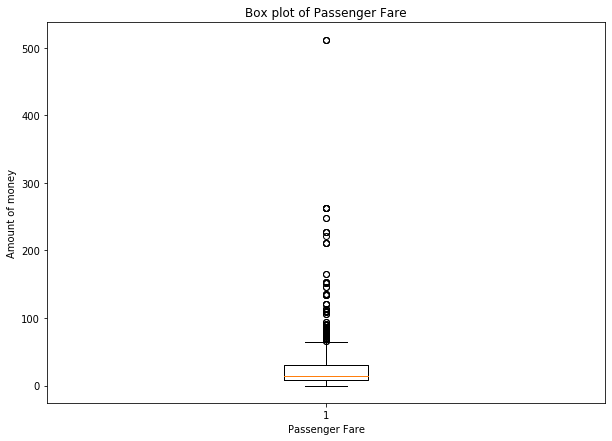

In [33]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title("Box plot of Passenger Fare")
ax.set_xlabel("Passenger Fare")
ax.set_ylabel("Amount of money")
ax.boxplot(df["Fare"]);

Seems there is an outlier at the very top. Look into more detail of the value.

Here I define the outlier as `Fare > MEAN + 2 * STD` and `Fare = 0`.

In [34]:
mean_fare = df["Fare"].mean()
std_fare = df["Fare"].std()
df[df["Fare"] > mean_fare + 2 * std_fare]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.00,1,0,PC 17569,146.5208,B78,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


Now I need to think about the definition of the outlier because there are more outliers than I thought.
In this table, most of them are under `300.0` so I am going to change the definition of the outlier to as `Fare` >= 300.

In [35]:
df[df["Fare"] > 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<img width="532" alt="b_deck" src="https://user-images.githubusercontent.com/44624585/61585177-b539d680-ab0a-11e9-8793-e0e90f8a06ab.png">

**Solution**
- For `PassengerId: 680`: This family is staying in three rooms, `B51`, `B53`, and `55`, which seem to connect with each other. In addition, those three rooms have a private promenade. It must be expensive. So I just leave this there as a valid value instead of dealing with an outlier.<br><br>
- For `PassengerId 738`: The room `B101` is not big that much, and the person is on board just himself. Therefore I am going to deal with this value as an outlier. And the type of room is similar to `B102`. If there is a fare of `B102` in the dataset, I will use the value as the fare of this person. If not, I will take the average of fare of the rooms that are similar to `B101`.<br><br>
- For `PassengerId 259`: The information of this person is similar to `PassengerId 738`. So I am going to deal with this fare as an outlier and replace it to the same fare as `PassengerId 738's`.  

For `PassengerId 738`:

In [36]:
df[df["Cabin"] == "B102"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
816,0,1,"Fry, Mr. Richard",male,38.0,0,0,112058,0.0,B102,S


OK, we don't have information of fare of `B102`. Let's take a look at other `B` cabins.

In [37]:
df[df["Cabin"].str.startswith("B", na=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


As we saw, we don't have information of the fare of `B102`, which means it is hard to guess the fare of `B101`.
However, we can find a room whose size is similar to `B101`, and `B94` is one of them.
So the next things we can do is take a look at rooms around `B94` so that we might find clues. 

<img width="1034" alt="Screen Shot 2019-07-21 at 4 43 07 PM" src="https://user-images.githubusercontent.com/44624585/61598731-aae50e80-abd6-11e9-8cc6-1ee908b8a267.png">

<img width="283" alt="cabin94" src="https://user-images.githubusercontent.com/44624585/61585376-faf89e00-ab0e-11e9-8291-a4ad33ebb305.png">

OK, we son't have the fare of `B94` too but we do have information of `B98` and `B96`.
So the conclusion is as follows:

In [38]:
df[df["Fare"] > 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


|ID|Inserting value|
|-|-|
|`PassengerId 259`: |The mean of `B96` and `B98`|
|`PassengerId680`: |Leave this there|
|`PassengerId 738`: |The mean of `B96` and `B98`|

In [39]:
print(df.iloc[258, :])
print("\n")
print(df.iloc[737, :])

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                 512.329
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object


Survived                         1
Pclass                           1
Name        Lesurer, Mr. Gustave J
Sex                           male
Age                             35
SibSp                            0
Parch                            0
Ticket                    PC 17755
Fare                       512.329
Cabin                         B101
Embarked                         C
Name: 738, dtype: object


In [40]:
df.iloc[258, -3] = 60.0000
df.iloc[737, -3] = 60.0000

In [41]:
print(df.iloc[258, :])
print("\n")
print(df.iloc[737, :])

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                      60
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object


Survived                         1
Pclass                           1
Name        Lesurer, Mr. Gustave J
Sex                           male
Age                             35
SibSp                            0
Parch                            0
Ticket                    PC 17755
Fare                            60
Cabin                         B101
Embarked                         C
Name: 738, dtype: object


#### Now it's time to look into `Fare = 0`

In [42]:
df[df["Fare"] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


**About the table above**
- We don't have information for `Cabins` except for three rows, `PassengerId: 264`, `Passenger: 807`, and `PassengerId: 816`.

**How are we going to deal with?**

|ID|Inserting Values|
|-|-|
|`PassengerId 264:`<br>`PassengerId 807:`<br>`PassengerId 816:`<br>|Make reference to rooms around them respectively.|
|The others: |Use the average of each `Pclass`|

**Search for Cabin `A`s**

In [43]:
df[df["Cabin"].str.startswith("A", na=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
186,0,1,"Rood, Mr. Hugh Roscoe",male,38.0,0,0,113767,50.0000,A32,S
210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
285,0,1,"Smith, Mr. Richard William",male,38.0,0,0,113056,26.0000,A19,S
446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
476,0,1,"Clifford, Mr. George Quincy",male,38.0,0,0,110465,52.0000,A14,S
557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C


<img width="451" alt="Screen Shot 2019-07-21 at 4 30 01 PM" src="https://user-images.githubusercontent.com/44624585/61598568-db2bad80-abd4-11e9-8fd9-81499361ea6d.png">

Unfortunately, we don't have the fare's information of `A-37`. So we will use the mean of `Pclass = 1` to fill the fare of `A36`.
And we have already talked about `B102` and `B94` in Missing Values section.

**Conclusion**

In [44]:
df[df["Fare"] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


|ID|Inserting Values|
|-|-|
|`PassengerId 264`: <br>`PassengerId 816`: |The mean of `B96` and `B98`, which is 60.0000|
|`PassengerId 807`: and the others: |Use the mean of each of `Pclass` respectively|

In [45]:
print(df.iloc[263, :])
print("\n")
print(df.iloc[815, :])

Survived                        0
Pclass                          1
Name        Harrison, Mr. William
Sex                          male
Age                            40
SibSp                           0
Parch                           0
Ticket                     112059
Fare                            0
Cabin                         B94
Embarked                        S
Name: 264, dtype: object


Survived                   0
Pclass                     1
Name        Fry, Mr. Richard
Sex                     male
Age                       38
SibSp                      0
Parch                      0
Ticket                112058
Fare                       0
Cabin                   B102
Embarked                   S
Name: 816, dtype: object


In [46]:
df.iloc[263, -3] = 60.0000
df.iloc[815, -3] = 60.0000

In [47]:
print(df.iloc[263, :])
print("\n")
print(df.iloc[815, :])

Survived                        0
Pclass                          1
Name        Harrison, Mr. William
Sex                          male
Age                            40
SibSp                           0
Parch                           0
Ticket                     112059
Fare                           60
Cabin                         B94
Embarked                        S
Name: 264, dtype: object


Survived                   0
Pclass                     1
Name        Fry, Mr. Richard
Sex                     male
Age                       38
SibSp                      0
Parch                      0
Ticket                112058
Fare                      60
Cabin                   B102
Embarked                   S
Name: 816, dtype: object


In [48]:
pclass_mean = df["Fare"].groupby(df["Pclass"]).mean().tolist()
pclass_mean

[80.52200972222215, 20.66218315217391, 13.675550101832997]

In [49]:
df3 = pd.DataFrame(df["Fare"][df["Pclass"] == 1])
idxs3 = df3[df3["Fare"] == 0].index.tolist()
idxs3 = np.array(idxs3)
idxs3 = idxs3 - 1
idxs3 = list(idxs3)
df.iloc[idxs3, -3] = pclass_mean[0]

df4 = pd.DataFrame(df["Fare"][df["Pclass"] == 2])
idxs4 = df4[df4["Fare"] == 0].index.tolist()
idxs4 = np.array(idxs4)
idxs4 = idxs4 - 1
idxs4 = list(idxs4)
df.iloc[idxs4, -3] = pclass_mean[1]

df5 = pd.DataFrame(df["Fare"][df["Pclass"] == 3])
idxs5 = df5[df5["Fare"] == 0].index.tolist()
idxs5 = np.array(idxs5)
idxs5 = idxs5 - 1
idxs5 = list(idxs5)
df.iloc[idxs5, -3] = pclass_mean[2]

In [50]:
df[df["Fare"] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [52]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000
mean,0.383838,2.308642,29.265062,0.523008,0.381594,31.79521
std,0.486592,0.836071,13.212184,1.102743,0.806057,44.13106
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.01250
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.50000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.27500
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Remove columns

In [67]:
dataset = df.copy()

In [68]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we already talked about, we are going to remove the `Cabin` column. In addtion, the `Name` and `Ticket` columns also will be removed because I don't think there are strong correlation between each of them and `Survived`.

In [69]:
dataset = dataset.drop(["Name", "Ticket", "Cabin"], axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Non-numerical data

**The columns that contains non-numerical data**
- `Sex`: Usually, sex is not dealt with ordinal variable, but I am going to deal with sex as an ordinal variable here because the female has more priority to be rescued. {male: 0, female: 1}
- `Embarked`: This is not ordinal variable so I am going to use one-hot.

In [96]:
def dummy_sex(df_dummy, column):
    """
    Create ordinal dummies.
    
    Parameters
    ----------------
    df_dummt: Pandas DataFrame
    column: str
        The name of the column to be transformed.
        
    Return
    ---------
    df_dummy: Pandas DataFrame
    """
    sex = {
        "male": 0,
        "female": 1,
    }
    f = lambda x: sex[x]
    df_dummy[column] = df_dummy[column].map(f)
    return df_dummy

In [ ]:
dataset = dummy_sex(dataset, "Sex")

In [98]:
def create_dummy(df_dummy, column):
    """
    Do one-hot encoding on the given column in the given dataframe
    
    Parameters
    ----------------
    df_dummy: Pandas dataFrame
    column: str
        The name of column to be encoded
        
        
    Return
    ---------
    df_dummy: Pandas DataFrame
    """
    dummies = pd.get_dummies(df_dummy[column])
    df_dummy = df_dummy.drop([column], axis=1)
    df_dummy = df_dummy.join(dummies)
    return df_dummy

In [ ]:
dataset = create_dummy(dataset, column="Embarked")
dataset.head()

## Pclass

In [79]:
def switch_pclass(df_switch, column):
    """
    Switch values.
    1(int) -> 3(int), 
    2(int) -> 2(int),
    3(int) -> 1(int),
    
    Parameters
    ----------------
    df_switch: Pandas dataFrame
    column: str
        The name of column to be switch its values
        
    Return
    ---------
    df_switch: Pandas DataFrame
    """
    pclass_dict = {
        1: 3,
        2: 2,
        3: 1,
    }
    f = lambda x: pclass_dict[x]
    df_switch[column] = df_switch[column].map(f)
    return df_switch

In [ ]:
dataset = switch_pclass(dataset, column="Pclass")

## Normalization

In [73]:
def normalization(df_norm, column):
    """
    Normalize the given column in the given dataframe.
    
    Parameters
    ----------------
    df_norm: Pandas DataFrame
    
    column: str
        The column name to normalize
    
    Return
    ---------
    df_norm: Pandas DataFrame 
    """
    min_col = df_norm[column].min()
    max_col = df_norm[column].max()
    f = lambda x: (x - min_col) / (max_col - min_col)
    df_norm[column] = df_norm[column].map(f)
    return df_norm

In [74]:
dataset = normalization(dataset, column="Pclass")
dataset = normalization(dataset, column="Age")
dataset = normalization(dataset, column="SibSp")
dataset = normalization(dataset, column="Parch")
dataset = normalization(dataset, column="Fare")
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,0.0,0,0.271174,0.125,0.0,0.006369,0,0,1
2,1,1.0,1,0.472229,0.125,0.0,0.132340,1,0,0
3,1,0.0,1,0.321438,0.000,0.0,0.007697,0,0,1
4,1,1.0,1,0.434531,0.125,0.0,0.096569,0,0,1
5,0,0.0,0,0.434531,0.000,0.0,0.007943,0,0,1


In [75]:
dataset.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.345679,0.352413,0.362466,0.065376,0.063599,0.054656,0.188552,0.086420,0.725028
std,0.486592,0.418036,0.477990,0.166024,0.137843,0.134343,0.086818,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.271174,0.000000,0.000000,0.007697,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.321438,0.000000,0.000000,0.020632,0.000000,0.000000,1.000000
75%,1.000000,0.500000,1.000000,0.459663,0.125000,0.000000,0.053633,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Test set

In [86]:
test_df = pd.read_csv(str(test_path), index_col=["PassengerId"])
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [88]:
test_df_tmp1 = pd.DataFrame(test_df["Age"][test_df["Pclass"] == 1])
test_idxs1 = test_df_tmp1[test_df_tmp1["Age"].isnull()].index.tolist()
test_idxs1 = np.array(test_idxs1)
test_idxs1 = test_idxs1 - 892
test_idxs1 = list(test_idxs1)
test_df.iloc[test_idxs1, 3] = meanAge_pclass[0]

test_df_tmp2 = pd.DataFrame(test_df["Age"][test_df["Pclass"] == 2])
test_idxs2 = test_df_tmp2[test_df_tmp2["Age"].isnull()].index.tolist()
test_idxs2 = np.array(test_idxs2)
test_idxs2 = test_idxs2 - 892
test_idxs2 = list(test_idxs2)
test_df.iloc[test_idxs2, 3] = meanAge_pclass[1]

test_df_tmp3 = pd.DataFrame(test_df["Age"][test_df["Pclass"] == 3])
test_idxs3 = test_df_tmp3[test_df_tmp3["Age"].isnull()].index.tolist()
test_idxs3 = np.array(test_idxs3)
test_idxs3 = test_idxs3 - 892
test_idxs3 = list(test_idxs3)
test_df.iloc[test_idxs3, 3] = meanAge_pclass[2]

In [90]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [91]:
test_df[test_df["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [93]:
test_df.iloc[1044-892, -3] = pclass_mean[2]

In [94]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [95]:
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [97]:
test_df = dummy_sex(test_df, "Sex")
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,Q
893,3,1,47.0,1,0,7.0000,S
894,2,0,62.0,0,0,9.6875,Q
895,3,0,27.0,0,0,8.6625,S
896,3,1,22.0,1,1,12.2875,S


In [99]:
test_df = create_dummy(test_df, column="Embarked")
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,1,0
893,3,1,47.0,1,0,7.0000,0,0,1
894,2,0,62.0,0,0,9.6875,0,1,0
895,3,0,27.0,0,0,8.6625,0,0,1
896,3,1,22.0,1,1,12.2875,0,0,1


In [100]:
test_df = normalization(test_df, column="Pclass")
test_df = normalization(test_df, column="Age")
test_df = normalization(test_df, column="SibSp")
test_df = normalization(test_df, column="Parch")
test_df = normalization(test_df, column="Fare")
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,
892,1.0,0,0.452723,0.000,0.000000,0.015282,0,1,0
893,1.0,1,0.617566,0.125,0.000000,0.013663,0,0,1
894,0.5,0,0.815377,0.000,0.000000,0.018909,0,1,0
895,1.0,0,0.353818,0.000,0.000000,0.016908,0,0,1
896,1.0,1,0.287881,0.125,0.111111,0.023984,0,0,1


In [101]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
Pclass    418 non-null float64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null float64
Parch     418 non-null float64
Fare      418 non-null float64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(5), int64(1), uint8(3)
memory usage: 44.1 KB


In [102]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.632775,0.363636,0.387149,0.055921,0.043594,0.069437,0.244019,0.110048,0.645933
std,0.420919,0.481622,0.169480,0.112095,0.109048,0.109014,0.430019,0.313324,0.478803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.327443,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.477450,0.125000,0.000000,0.061429,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Models

In [106]:
import sklearn.tree

In [103]:
target = dataset["Survived"].values
explain = dataset[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "C", "Q", "S"]].values

In [108]:
d_tree = sklearn.tree.DecisionTreeClassifier()
d_tree = d_tree.fit(explain, target)

In [110]:
test_explain = test_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "C", "Q", "S"]].values
prediction = d_tree.predict(test_explain)
print(prediction.shape)
print(prediction)

(418,)
[0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]


In [113]:
submit_df = pd.read_csv(str(submit_example_path), index_col=["PassengerId"])
submit_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [115]:
submit_df["Survived"] = prediction
submit_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [118]:
submit_df.to_csv(str(submit_path), index_label = ["PassengerId"])